# Data Science Aplicada à Área de Saúde

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Manipulando Dados Para Previsão de AVC

O Acidente Vascular Cerebral (AVC) acontece quando vasos que levam sangue ao cérebro entopem ou se rompem, provocando a paralisia da área cerebral que ficou sem circulação sanguínea. É uma doença que acomete mais os homens e é uma das principais causas de morte, incapacitação e internações em todo o mundo.

Quanto mais rápido for o diagnóstico e o tratamento do AVC, maiores serão as chances de recuperação completa. Desta forma, torna-se primordial ficar atento aos sinais e sintomas e procurar atendimento médico imediato.

Existem dois tipos de AVC, que ocorrem por motivos diferentes: AVC hemorrágico e AVC isquêmico.

_O que é um AVC isquêmico_

O AVC isquêmico ocorre quando há obstrução de uma artéria, impedindo a passagem de oxigênio para células cerebrais, que acabam morrendo. Essa obstrução pode acontecer devido a um trombo (trombose) ou a um êmbolo (embolia). O AVC isquêmico é o mais comum e representa 85% de todos os casos.

_O que é um AVC hemorrágico_

O AVC hemorrágico ocorre quando há rompimento de um vaso cerebral, provocando hemorragia. Esta hemorragia pode acontecer dentro do tecido cerebral ou na superfície entre o cérebro e a meninge. É responsável por 15% de todos os casos de AVC, mas pode causar a morte com mais frequência do que o AVC isquêmico.

_Quais os principais fatores de risco para desenvolver um AVC?_

Existem diversos fatores que aumentam a probabilidade de ocorrência de um AVC, seja ele hemorrágico ou isquêmico. Os principais fatores causais das doenças são:

- Hipertensão;
- Diabetes tipo 2;
- Colesterol alto;
- Sobrepeso;
- Obesidade;
- Tabagismo;
- Uso excessivo de álcool;
- Idade avançada;
- Sedentarismo;
- Uso de drogas ilícitas;
- Histórico familiar;
- Ser do sexo masculino.

O AVC está altamente relacionado à idade, hipertensão, nível médio de glicose, status de tabagismo e IMC, enquanto isso depende parcialmente do sexo, doença cardíaca, tipo de trabalho e tipo de residência.

## Carregando Dados

In [1]:
# Importar pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/dataset-data-munging-01.csv')

In [3]:
# Visualizando os primriros registros
dataset.head()

,id,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,30669,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,NaN,0
1,30468,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,16523,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,NaN,0
3,56543,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,46136,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,NaN,0


In [4]:
# Formato dos dados
print(f'Número de linhas:\t{dataset.shape[0]}')
print(f'Número de colunas:\t{dataset.shape[1]}')

Número de linhas:	43400
Número de colunas:	12


In [5]:
# Tipos de dados
dataset.dtypes

id                       int64
sexo                    object
idade                  float64
hipertensao              int64
doenca_coracao           int64
casado                  object
tipo_trabalho           object
tipo_residencia         object
media_nivel_glicose    float64
imc                    float64
status_tabagismo        object
avc                      int64
dtype: object

In [6]:
# Análise da variável target
print(f'Pessoas que tiveram AVC:\nfreq: {dataset.avc.sum()}\tProp: {dataset.avc.mean():.3f}')
print(f'\nPessoas que não tiveram AVC:\nfreq: {dataset.shape[0] - dataset.avc.sum()}\tProp: {1 - dataset.avc.mean():.3f}')

Pessoas que tiveram AVC:
freq: 783	Prop: 0.018

Pessoas que não tiveram AVC:
freq: 42617	Prop: 0.982


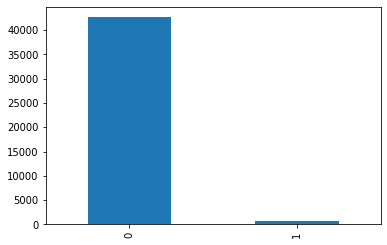

In [7]:
# Visualizar balanceamento
dataset.avc.value_counts().plot(kind='bar');

## Identificando e Removendo Colunas Irrelevantes

O AVC está altamente relacionado à idade, hipertensão, nível médio de glicose, status de tabagismo e IMC, enquanto isso depende parcialmente do sexo, doença cardíaca, tipo de trabalho e tipo de residência.

In [8]:
# Excluímos a coluna 'id' porque esse é apenas um número arbitrário a cada paciente,
# sem relevância com AVC
del dataset['id']

In [9]:
# Excluímos a coluna 'casado', já que não parece ser um bom identificador para prever um AVC
del dataset['casado']

In [10]:
# Coletando estatísticas das colunas
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [11]:
# Extraindo variáveis do tipo categóricas 
dfcatname = dataset.dtypes[dataset.dtypes == 'object'].index
dfcatname

Index(['sexo', 'tipo_trabalho', 'tipo_residencia', 'status_tabagismo'], dtype='object')

In [12]:
# Extraindo variáveis do tipo numéricas
dfconname = [item for item in list(dataset.columns) if item not in list(dfcatname)]
dfconname

['idade', 'hipertensao', 'doenca_coracao', 'media_nivel_glicose', 'imc', 'avc']

In [13]:
# Descrevendo as variávies categóricas 
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


## Tratamento de Valores Missing no IMC

In [14]:
# Descrevendo a coluna IMC
dataset['imc'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: imc, dtype: float64

In [15]:
# Checando valores missing
dataset['imc'].isnull().sum()

1462

Uma maneira de tratar um valor ausente é simplesmente remover o registro completo, e em nosso exemplo teríamos que remover 1462/43400 o que é um número relativamente pequeno.

Outra solução quando trabalhamos com variáveis numéricas é imputar zero, valores centrais ou estatisticamente estimados, no lugar de NAN.

Para verificar se podemos atribuir valor central, vamos plotar o histograma.

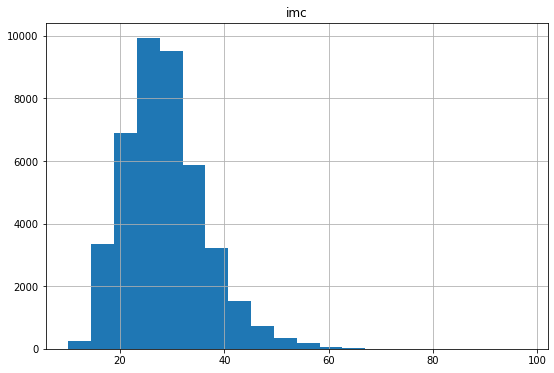

In [16]:
dataset.hist(column = 'imc', figsize=(9,6), bins=20);

Vê-se no histograma que o valor de IMC entre 20 e 40 é o mais comum, portanto, não é totalmente irracional utilizá-lo no lugar de valores missing.

Vamos imputar a tendência central (média) no lugar de valores ausentes.

In [17]:
# Gera o novo imc
novo_imc = np.where(dataset['imc'].isnull(), dataset['imc'].mean(), dataset['imc'])

In [18]:
novo_imc

array([18. , 39.2, 17.6, ..., 28.9, 33.2, 20.6])

In [19]:
# Grava o novo valor do imc no dataset
dataset['imc'] = novo_imc

In [20]:
dataset['imc'].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

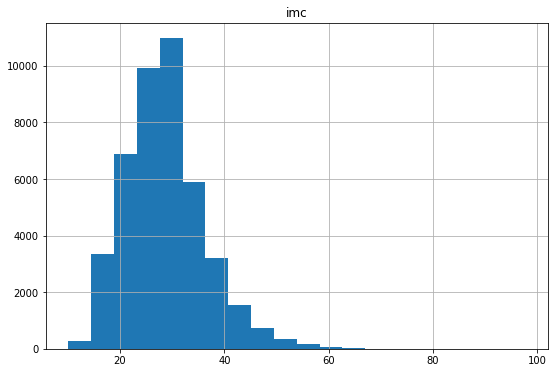

In [21]:
# Checando o histograma
dataset.hist(column = 'imc', figsize=(9,6), bins=20);

## Tratamento de Valores Missing no Status de Tabagismo

In [22]:
# Descrevendo as variáveis categóricas
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


In [23]:
dataset['status_tabagismo'].describe()

count           30108
unique              3
top       nunca fumou
freq            16053
Name: status_tabagismo, dtype: object

In [24]:
dataset['status_tabagismo'].isnull().sum()

13292

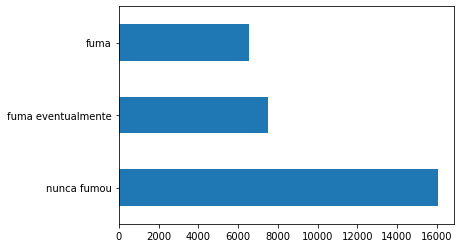

In [25]:
dataset['status_tabagismo'].value_counts().plot(kind='barh');

Vamos preencher os valores missing com uma nova categoria chamada 'desconhecido'.

In [26]:
novo_status_tabagismo = np.where(dataset['status_tabagismo'].isnull(), "desconhecido", dataset['status_tabagismo'])

In [27]:
dataset['status_tabagismo'] = novo_status_tabagismo

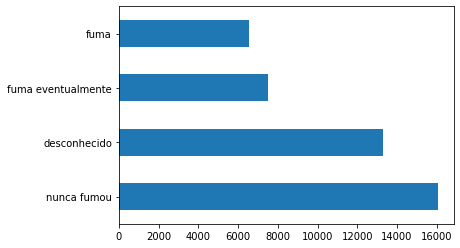

In [28]:
dataset['status_tabagismo'].value_counts().plot(kind='barh');

In [29]:
dataset.count()

sexo                   43400
idade                  43400
hipertensao            43400
doenca_coracao         43400
tipo_trabalho          43400
tipo_residencia        43400
media_nivel_glicose    43400
imc                    43400
status_tabagismo       43400
avc                    43400
dtype: int64

## Tratamento de Outliers

In [30]:
dataset[dfconname]

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0
43396,56.0,0,0,213.61,55.4,0
43397,82.0,1,0,91.94,28.9,0
43398,40.0,0,0,99.16,33.2,0


In [31]:
dataset[dfconname[0]].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: idade, dtype: float64

In [32]:
dataset[dfconname[3]].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: media_nivel_glicose, dtype: float64

In [33]:
dataset[dfconname[4]].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

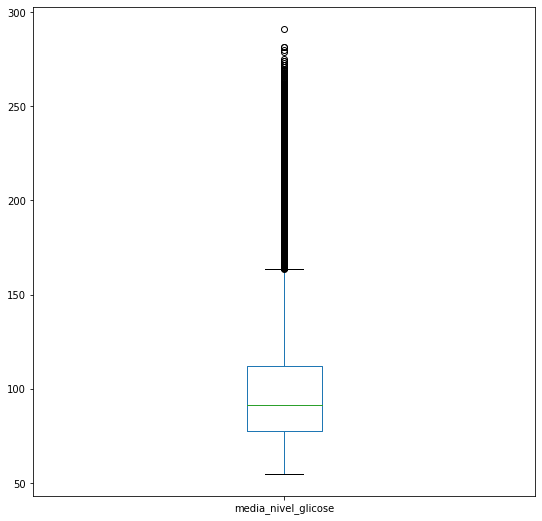

In [34]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável media_nivel_glicose
dataset[dfconname[3]].plot(kind='box', figsize=(9,9));

In [35]:
# Removendo outliers
index1 = np.where(dataset['media_nivel_glicose'] == max(dataset['media_nivel_glicose']))

In [36]:
dataset.loc[index1]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
38446,Feminino,80.0,0,0,Privado,Rural,291.05,28.7,nunca fumou,0


In [37]:
dataset = dataset.drop(index1[0])

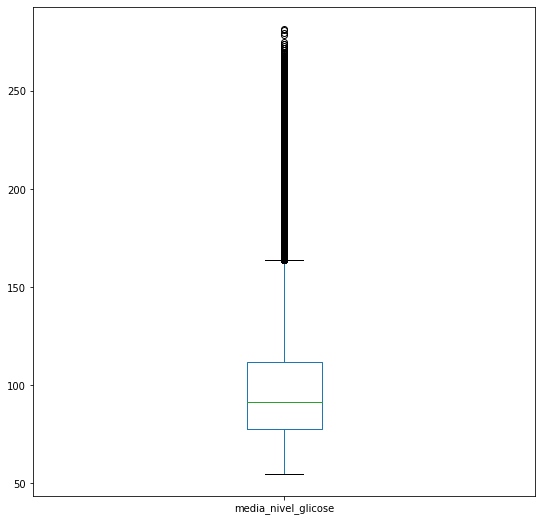

In [38]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
dataset[dfconname[3]].plot(kind='box', figsize=(9,9));

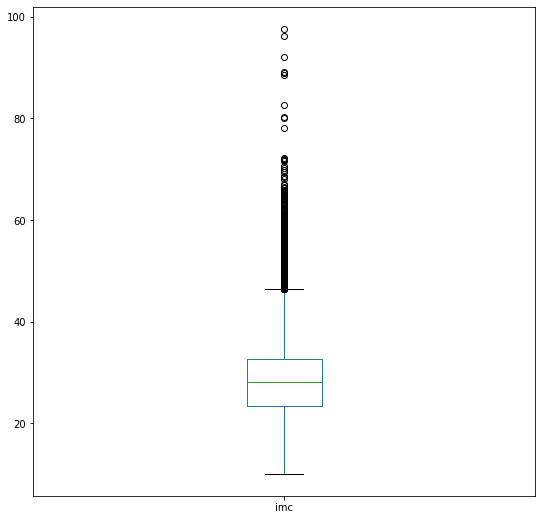

In [39]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados.
# Variável imc
dataset[dfconname[4]].plot(kind='box', figsize=(9,9));

In [40]:
index2 = np.where(dataset['imc'] == max(dataset['imc']))

In [41]:
dataset.loc[index2]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
1913,Masculino,17.0,1,0,Privado,Rural,61.67,97.6,desconhecido,0


O valor do IMC pode chegar até aproximadamente 54, o que também é um caso muito raro, mas nosso conjunto de dados tem alguns valores maiores que 54, que também atuam apenas como outliers, eu prefiro removê-los mantendo a margem. Isso não afetará os dados, e os manterão realistas.

In [42]:
dataset = dataset[dataset['imc'] < 60]

In [43]:
dataset.count()

sexo                   43309
idade                  43309
hipertensao            43309
doenca_coracao         43309
tipo_trabalho          43309
tipo_residencia        43309
media_nivel_glicose    43309
imc                    43309
status_tabagismo       43309
avc                    43309
dtype: int64

In [44]:
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000
mean,42.213087,0.09326,0.047542,104.442117,28.526248,0.018079
std,22.533671,0.29080,0.212798,43.060134,7.438084,0.133240
min,0.080000,0.00000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.00000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.00000,0.000000,91.570000,28.000000,0.000000
75%,60.000000,0.00000,0.000000,112.030000,32.600000,0.000000
max,82.000000,1.00000,1.000000,281.590000,59.900000,1.000000


In [45]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,Masculino,3.0,0,0,crianca,Rural,95.12,18.0,desconhecido,0
1,Masculino,58.0,1,0,Privado,Urbana,87.96,39.2,nunca fumou,0
2,Feminino,8.0,0,0,Privado,Urbana,110.89,17.6,desconhecido,0
3,Feminino,70.0,0,0,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,Masculino,14.0,0,0,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0


## Convertendo Variáveis Categóricas em Valores Numéricos

In [46]:
dataset[dfcatname].head()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
0,Masculino,crianca,Rural,desconhecido
1,Masculino,Privado,Urbana,nunca fumou
2,Feminino,Privado,Urbana,desconhecido
3,Feminino,Privado,Rural,fuma eventualmente
4,Masculino,Nunca_trabalhou,Rural,desconhecido


In [47]:
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43309,43309,43309,43309
unique,3,5,2,4
top,Feminino,Privado,Urbana,nunca fumou
freq,25605,24770,21712,16016


In [48]:
dataset['sexo'].unique()

array(['Masculino', 'Feminino', 'Outro'], dtype=object)

In [49]:
dataset['tipo_residencia'].unique()

array(['Rural', 'Urbana'], dtype=object)

Usaremos Label Encoding nas colunas tendo 3 ou menos categorias.

In [50]:
dataset['sexo'] = dataset['sexo'].astype('category')

In [51]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].astype('category')

In [54]:
dataset['sexo'] = dataset['sexo'].cat.codes

In [55]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].cat.codes

In [56]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,1,3.0,0,0,crianca,0,95.12,18.0,desconhecido,0
1,1,58.0,1,0,Privado,1,87.96,39.2,nunca fumou,0
2,0,8.0,0,0,Privado,1,110.89,17.6,desconhecido,0
3,0,70.0,0,0,Privado,0,69.04,35.9,fuma eventualmente,0
4,1,14.0,0,0,Nunca_trabalhou,0,161.28,19.1,desconhecido,0


Usaremos One-Hot Encoding nas colunas com mais de 3 categorias. Essa técnica amenta o número de colunas no conjunto de dados.

In [57]:
dataset = pd.get_dummies(
    data = dataset, 
    columns = ['tipo_trabalho', 'status_tabagismo'], 
    prefix = ['trabalho', 'tabagismo']
)

In [58]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,87.96,39.2,0,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,1,110.89,17.6,0,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,0,69.04,35.9,0,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,0,0


## Machine Learning - Classificação

In [59]:
dataset.describe()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
count,43309.000000,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000
mean,0.409037,42.213087,0.09326,0.047542,0.501328,104.442117,28.526248,0.018079,0.156480,0.004087,0.571937,0.125378,0.142118,0.306380,0.151123,0.172689,0.369808
std,0.492178,22.533671,0.29080,0.212798,0.500004,43.060134,7.438084,0.133240,0.363314,0.063799,0.494804,0.331151,0.349175,0.460995,0.358173,0.377983,0.482758
min,0.000000,0.080000,0.00000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.00000,0.000000,1.000000,91.570000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,1.000000,112.030000,32.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,82.000000,1.00000,1.000000,1.000000,281.590000,59.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# Divisão dos dados em X e y
X = dataset.loc[:, dataset.columns != 'avc']
y = dataset['avc']

In [61]:
# Parâmnetros para a divisão dos dados em treino e teste
seed = 7
test_size = 0.33

In [64]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = test_size, random_state = seed)

In [65]:
X_treino.shape

(29017, 16)

In [66]:
X_teste.shape

(14292, 16)

In [67]:
y_treino.shape

(29017,)

In [68]:
y_teste.shape

(14292,)

## Criando o Classificador

In [70]:
# Importar pacotes
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Cria o classificador 
modelo = RandomForestClassifier()

# Treina e cira o modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# Previsões com dados de teste
y_pred = modelo.predict(X_teste)

In [78]:
# Avaliando as previsões
from sklearn.metrics import accuracy_score, roc_auc_score
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia*100:.2f}%')

Acurácia: 98.27%


## Fazendo Previsões com Novos Dados

In [104]:
# Carrega os dados
dataset_novos_dados = pd.read_csv('dados/dataset-data-munging-01-novos_dados.csv')

Aplicamos aos novos dados as mesmas manipulações que foram feitas com os dados de treinamento.

In [105]:
del dataset_novos_dados['casado']

In [106]:
novo_status_tabagismo = np.where(
    dataset_novos_dados['status_tabagismo'].isnull(), 
    "desconhecido",
    dataset_novos_dados['status_tabagismo']
)

In [107]:
dataset_novos_dados['status_tabagismo'] = novo_status_tabagismo

In [108]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                     True
status_tabagismo       False
dtype: bool

In [109]:
novo_imc = np.where(
    dataset_novos_dados['imc'].isnull(),
    dataset_novos_dados['imc'].mean(),
    dataset_novos_dados['imc']
)

In [110]:
dataset_novos_dados['imc'] = novo_imc

In [111]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                    False
status_tabagismo       False
dtype: bool

In [113]:
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].astype('category')
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].astype('category')
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].cat.codes
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].cat.codes
dataset_novos_dados = pd.get_dummies(
    data = dataset_novos_dados,
    columns = ['tipo_trabalho', 'status_tabagismo'],
    prefix = ['trabalho', 'tabagismo']
)
dataset_novos_dados

,id,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,36306,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,61829,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,14152,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,12997,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,40801,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,362,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,29839,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,6438,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


In [114]:
# Separando a coluna id para usarmos mais tarde
X_novos_dados = dataset_novos_dados.loc[:, dataset_novos_dados.columns != 'id']
paciente_id = dataset_novos_dados['id']
X_novos_dados

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


## Previsões com o Modelo Treinado

In [115]:
X_novos_dados

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


In [116]:
# Usando dados de teste para as previsões
y_novos_dados_label = modelo.predict(X_novos_dados)
y_novos_dados_prob = modelo.predict_proba(X_novos_dados)

In [117]:
y_novos_dados_label

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
y_novos_dados_prob

array([[0.95, 0.05],
       [0.95, 0.05],
       [1.  , 0.  ],
       ...,
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [133]:
# Extraindo todas as previsões
## Cria um vetor vazio
y_novos_dados = [None] * len(X_novos_dados)

## Loop pelas previsões e gravações no vetor de previsões
for i in range(len(X_novos_dados)):
    y_novos_dados[i] = y_novos_dados_prob[i]

In [134]:
# Vetor de previsões
y_novos_dados[:5]

[array([0.95, 0.05]),
 array([0.95, 0.05]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.])]

In [136]:
# Salvando o resultado com as previsões para cada paciente
resultado = pd.DataFrame()
resultado['id'] = paciente_id
resultado['avc'] = y_novos_dados
resultado.to_csv('dados/resultado.csv', index=False)

---